In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import random as rd
from nltk import bigrams,trigrams
import matplotlib.pyplot as plt
import codecs
import re
import os.path
import nltk
from nltk.stem import PorterStemmer
import string
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import KFold


### Charger les données 

In [282]:
##Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs


### Train set

In [283]:
path_train= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.learn.utf8"
trainalltxts,trainalllabs = load_pres(path_train)

print("la longueur du training data_set est de:",len(trainalltxts),len(trainalllabs))
liste_1 = []
for i in trainalllabs: 
    if i == 1 : 
        liste_1.append(i)
print ("La taille des dataset ( texte + ettiquettes ) train sont ", len(trainalltxts), len(trainalllabs))       
print("La proportion d'etiquettes 1 est de:", (len(liste_1)/(len(trainalllabs))*100))
print("La proportion d'etiquettes -1 est de:", (100 - len(liste_1)/len(trainalllabs)*100))
print(" ")
print("EXTRAIT:") 
print(trainalltxts[:5])
print(trainalllabs[:5])
print(trainalltxts[-1])
print(trainalllabs[-1])

la longueur du training data_set est de: 57413 57413
La taille des dataset ( texte + ettiquettes ) train sont  57413 57413
La proportion d'etiquettes 1 est de: 86.89669587027329
La proportion d'etiquettes -1 est de: 13.103304129726709
 
EXTRAIT:
[" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n", " D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n", " C'est toujours très émouvant de venir en Afrique car c'est probablement l'une des rares terres du monde où l'on ait conservé cette convivialité, cette amitié, ce respect de l'autre qui s'expriment avec chaleur, avec spontanéité et qui réchauffent le coeur de ceux qui arrivent et de ceux qui reçoivent.\n", ' Aucun citoyen français ne peut être indifférent à un séjour à Brazzaville.\n', ' Le Congo, que naguère le <nom> qualifia de "refuge pour la liberté", de "base de départ pour la libération", de "môle pou

### Test set 

In [284]:
path_test= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.test.utf8"
#text = open("ressources/AFDpresidentutf8/corpus.tache1.test.utf8",encoding="utf-8")
testalltxts,testalllabs = load_pres(path_test)

print("la longueur du data_set test est de:",len(testalltxts),len(testalllabs))

la longueur du data_set test est de: 27162 27162


### Split training set in training set (76%) and validation set (33%)

In [285]:
# only one split between train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainalltxts, trainalllabs, test_size=0.3, random_state=0) 
print(" Taille du dataset train :", len(X_train),"soit:", len(X_train)/len(trainalltxts)*100,"%")
print(" Taille du dataset validation:",len(X_test),"soit:",(100-(len(X_train)/len(trainalltxts)*100),"%"))

liste_1 = []
for i in y_train : 
    if i == 1 : 
        liste_1.append(i)
print ("La taille des dataset ( texte + ettiquettes ) train sont ", len(X_train), len(y_train))       
print("La proportion d'etiquettes 1 est de:", (len(liste_1)/(len(y_train))*100))
print("La proportion d'etiquettes -1 est de:", (100 - len(liste_1)/len(y_train)*100))

 Taille du dataset train : 40189 soit: 69.99982582341978 %
 Taille du dataset validation: 17224 soit: (30.000174176580217, '%')
La taille des dataset ( texte + ettiquettes ) train sont  40189 40189
La proportion d'etiquettes 1 est de: 86.95414168055936
La proportion d'etiquettes -1 est de: 13.04585831944064


### Transformation paramétrique du texte
- 1 - Supprimer la ponctuation 
- 2 - Mettre en minuscule \
- 3 - Supprimer les nombres # semble inutile pour les nombres 
- 4 - Supprimer les accents 
- 5 - Normaliser les caractères 

In [286]:
import string
import re
import unicodedata
def pretraitement(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for element in string:  
        if element in punc:  
            string = string.replace(element, "") 
        string = string.lower()
        string = re.sub('[0-9]+', '', string)
        string = unicodedata.normalize('NFD',string).encode('ascii', 'ignore').decode("utf-8")
    return string


In [287]:
X_train = [pretraitement(i) for i in X_train]
print("Taille X_train apres le prétraitement:", len(X_train))
print(X_train [:1]) # cleaned list

Taille X_train apres le prétraitement: 40189
[' la reussite de lentreprise sabate laureate de ce prix de laudace creatrice cest davoir compris que lalliance de la tradition et de la haute technologie la qualite du dialogue social la continuite et la solidite vous levoquiez tout a lheure monsieur le president du capitalisme familial sont devenus les principaux ressorts du developpement des entreprises\n']


In [288]:
X_test = [pretraitement(i) for i in X_test]
print("Taille X_test apres le prétraitement:" ,len(X_test))
print(X_test[:1]) # cleaned list

Taille X_test apres le prétraitement: 17224
[' cest donc dans cet esprit que je suis venu aujourdhui\n']


### 4 - Extraction du vocabulaire
Exploration préliminaire des jeux de données.

#### 4.1 - Quelle est la taille d'origine du vocabulaire?

In [289]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
size_voc_train = count.fit_transform(X_train)
print(" La taille du vocabulaire d'origine de X train est :",len(count.get_feature_names()))
size_voc_test = count.fit_transform(X_test)
print(" La taille du vocabulaire d'origine de X test est :",len(count.get_feature_names()))

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 La taille du vocabulaire d'origine de X train est : 27741
 La taille du vocabulaire d'origine de X test est : 19523


#### 4.2 - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]

In [290]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
## Obtenir un work_cloud des 100 mots les plus frequents 
def most_freq(set,nb_word,color):
    word=[]
    for sentence in set:
            word += sentence.split()
    dico = Counter(word)  
    
    liste_word_most_common=[mot for mot,freq in dico.most_common()]
    liste_freq= [freq for mot,freq in dico.most_common()]   

    liste_word_MC_reduced  = " ".join(liste_word_most_common[:nb_word])
    wordcloud = WordCloud(background_color=color).generate(liste_word_MC_reduced )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    liste_mc = liste_word_most_common [:nb_word] 
    return liste_mc [:10]


['de', 'la', 'et', 'a', 'le', 'les', 'des', 'que', 'qui', 'en']

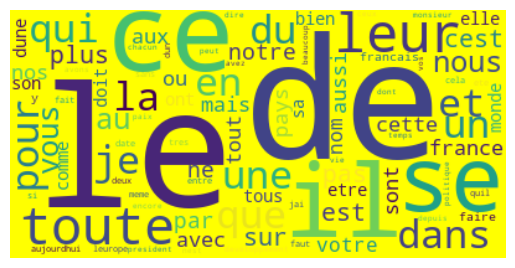

In [291]:
most_freq(X_train,100,"yellow")

['de', 'la', 'et', 'a', 'le', 'les', 'des', 'que', 'qui', 'en']

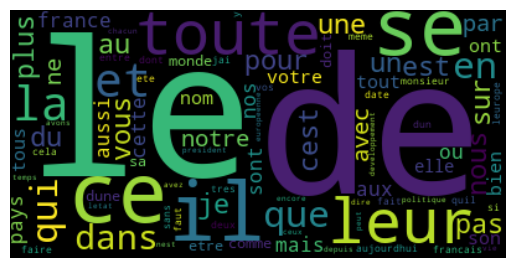

In [292]:
most_freq(X_test,100,"black")

#### 4.3 - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]

In [293]:
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import pandas as pd

def freq_documentaire (set,nb_word,color):
    words_1 = []
    for line in set:
        for word in line.split():
                words_1.append(word)

    fdist_train = FreqDist(words_1)
    most_freq_set = fdist_train.most_common(nb_word)
    liste_wt = []
    liste_freq = []

    for wt in most_freq_set:
        liste_wt.append(wt[0])
        liste_freq.append(wt[1])

    liste_wt= " ".join(liste_wt)
    nb_word = nb_word - 1 
    print("Le 1er mot dont la fréquence documentaire est la plus élevée est --> ", liste_wt[0],", avec une frequnce documentaire de:", liste_freq[0])
    print("Le 100 ème mot dont la fréquence documentaire est la plus élevée --> ", liste_wt[nb_word],", avec une frequnce documentaire de:", liste_freq[nb_word])
    wordcloud = WordCloud(background_color=color).generate(liste_wt)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 

Le 1er mot dont la fréquence documentaire est la plus élevée est -->  d , avec une frequnce documentaire de: 48276
Le 100 ème mot dont la fréquence documentaire est la plus élevée -->  t , avec une frequnce documentaire de: 841


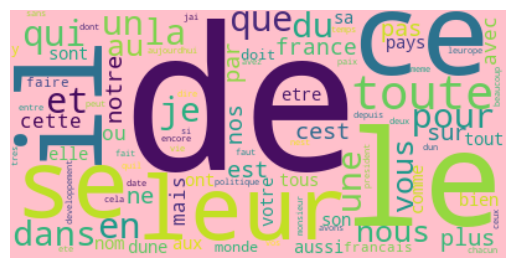

In [294]:
freq_documentaire(X_train,100,"pink")

Le 1er mot dont la fréquence documentaire est la plus élevée est -->  d , avec une frequnce documentaire de: 20709
Le 100 ème mot dont la fréquence documentaire est la plus élevée -->  r , avec une frequnce documentaire de: 370


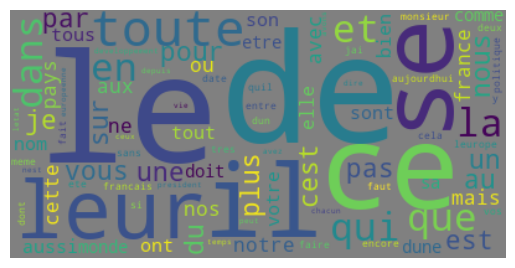

In [295]:
freq_documentaire(X_test,100,"grey")

#### 4.4 - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]

In [296]:
def odd_ratio (set,color):
    vectorizer= CountVectorizer()
    X1= vectorizer.fit_transform(X_train)
    df = pd.DataFrame(vectorizer.get_feature_names())

    # add oddratio column
    df['oddratio'] = np.exp(X1.mean(axis=0)).A1

    # sort by oddratio
    df.sort_values('oddratio', inplace=True, ascending=True)

    # get sorted feature names
    sorted_feature_names = df[0].to_list()
    sorted_feature_names =  " ".join(sorted_feature_names)
    wordcloud = WordCloud(background_color=color).generate(sorted_feature_names)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 

In [298]:
odd_ratio (X_train,"orange")

TypeError: 'dict' object is not callable

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


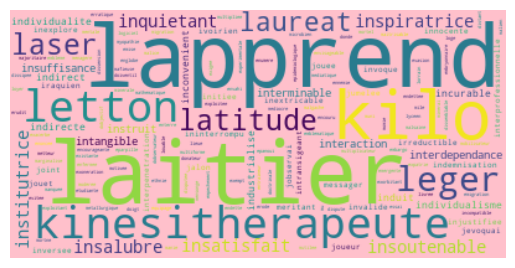

In [ ]:
odd_ratio(X_test,"pink")

#### 4.5 - Quelle est la distribution d'apparition des mots (Zipf)

In [ ]:
from collections import Counter
def distribution_zipf(set,nb_mot_affichés) : 
    word=[]
    for sentence in set:
        word += sentence.split()
        
    words_counter = Counter(word)  
    word_counter_dict = dict(words_counter)
    sorted(dict(words_counter).items(), key=lambda x: x[1])
    words = list(word_counter_dict.keys())
    counts = list(word_counter_dict.values())
    
    plt.figure(figsize=(40,15))
    plt.plot(words[:nb_mot_affichés], counts[:nb_mot_affichés]) 
    plt.title("Distribution de Zipf") 
    plt.xlabel("Mots") 
    plt.xticks(rotation=90)
    plt.ylabel("Nombres d'occurences")

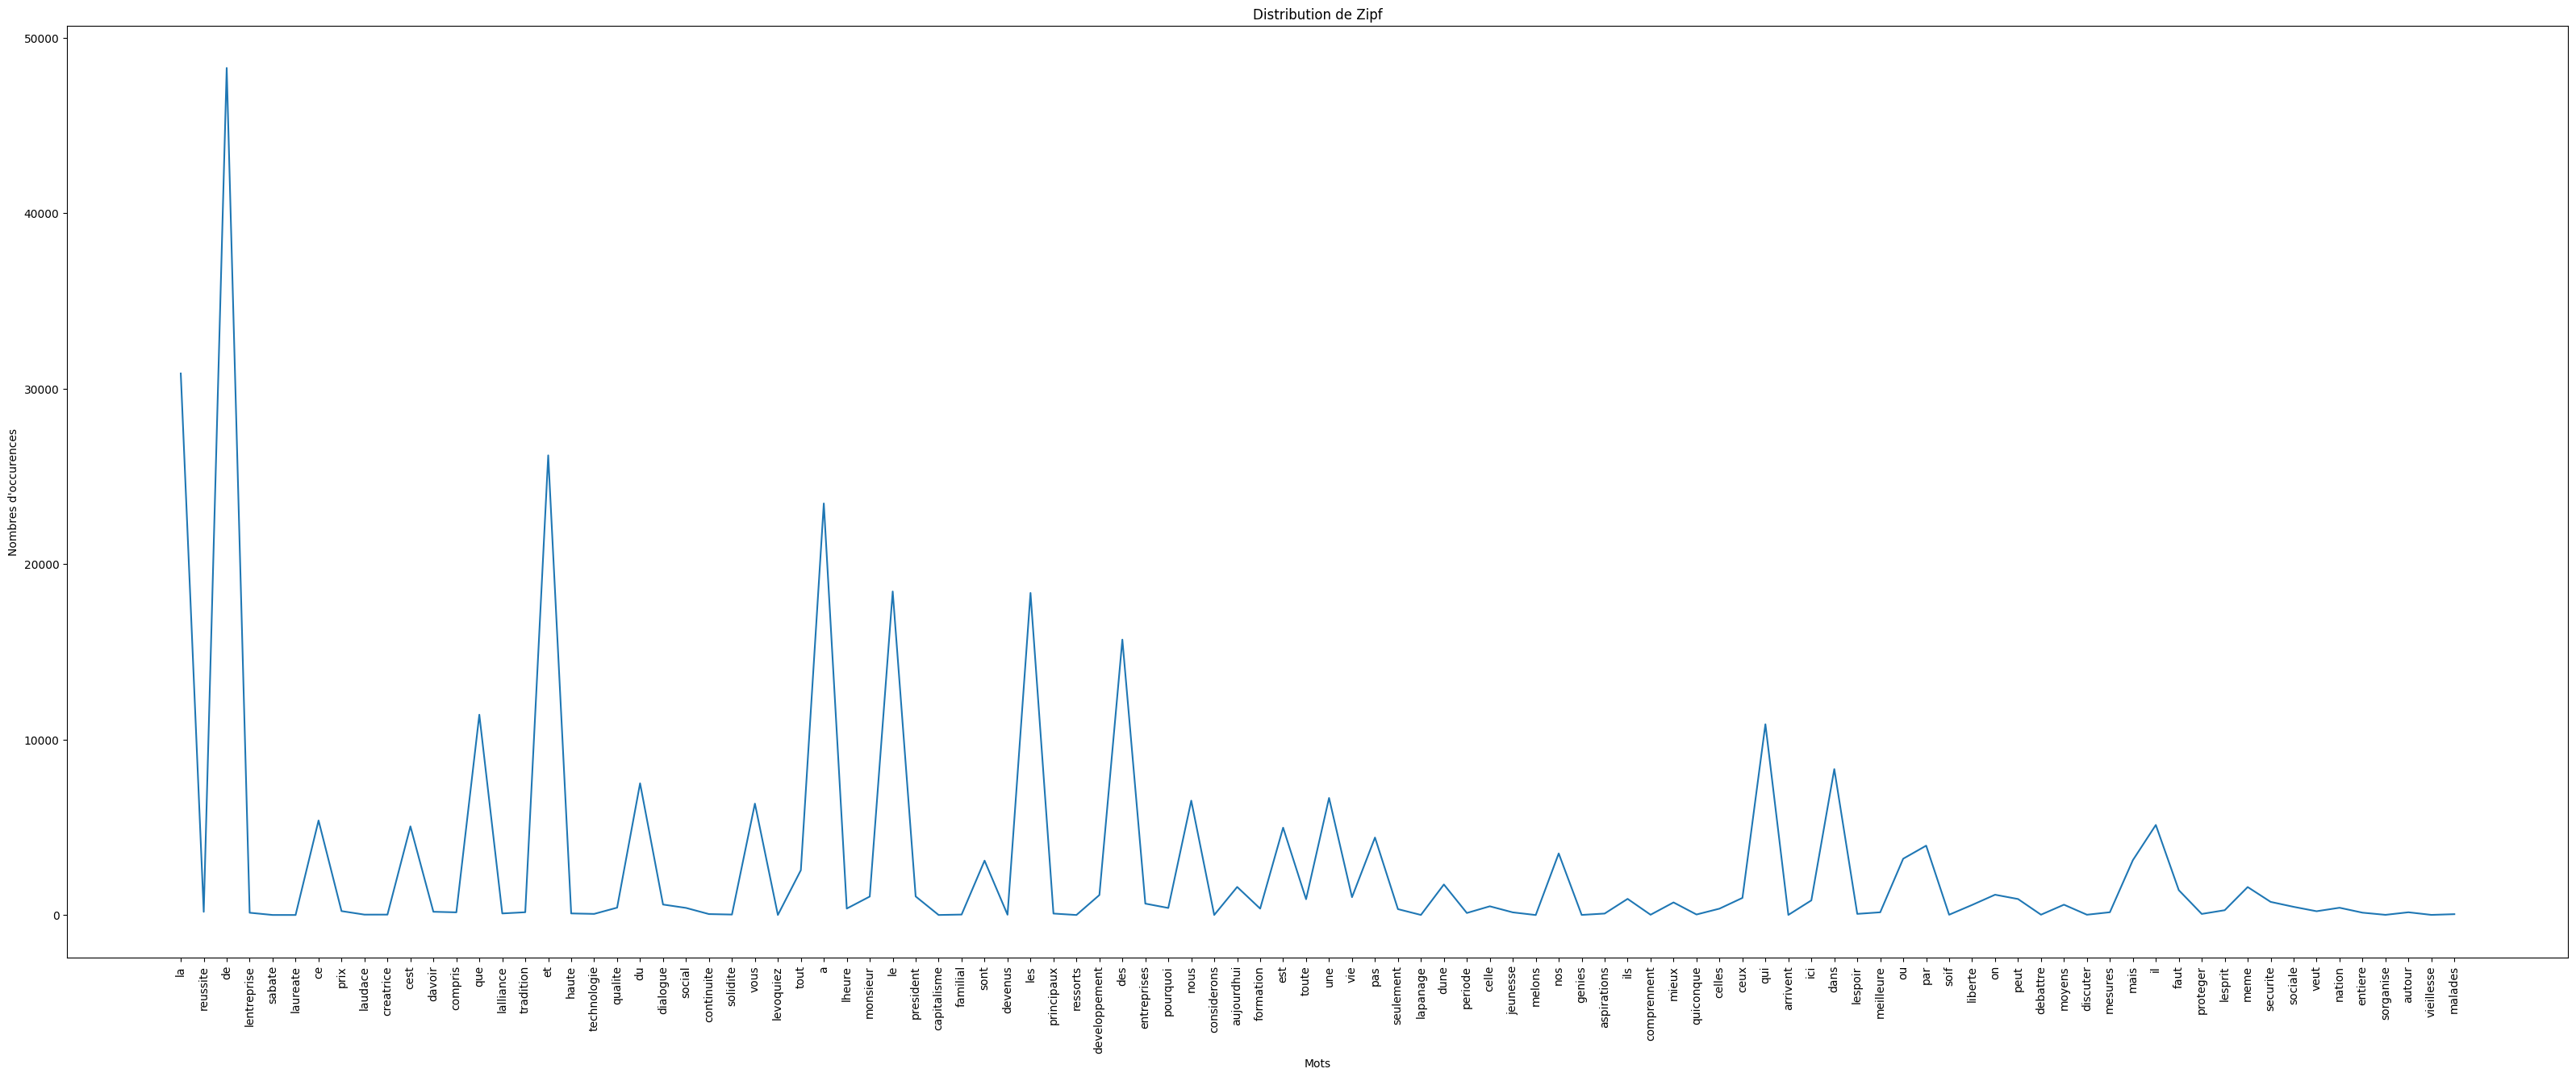

In [ ]:
distribution_zipf(X_train,100) 

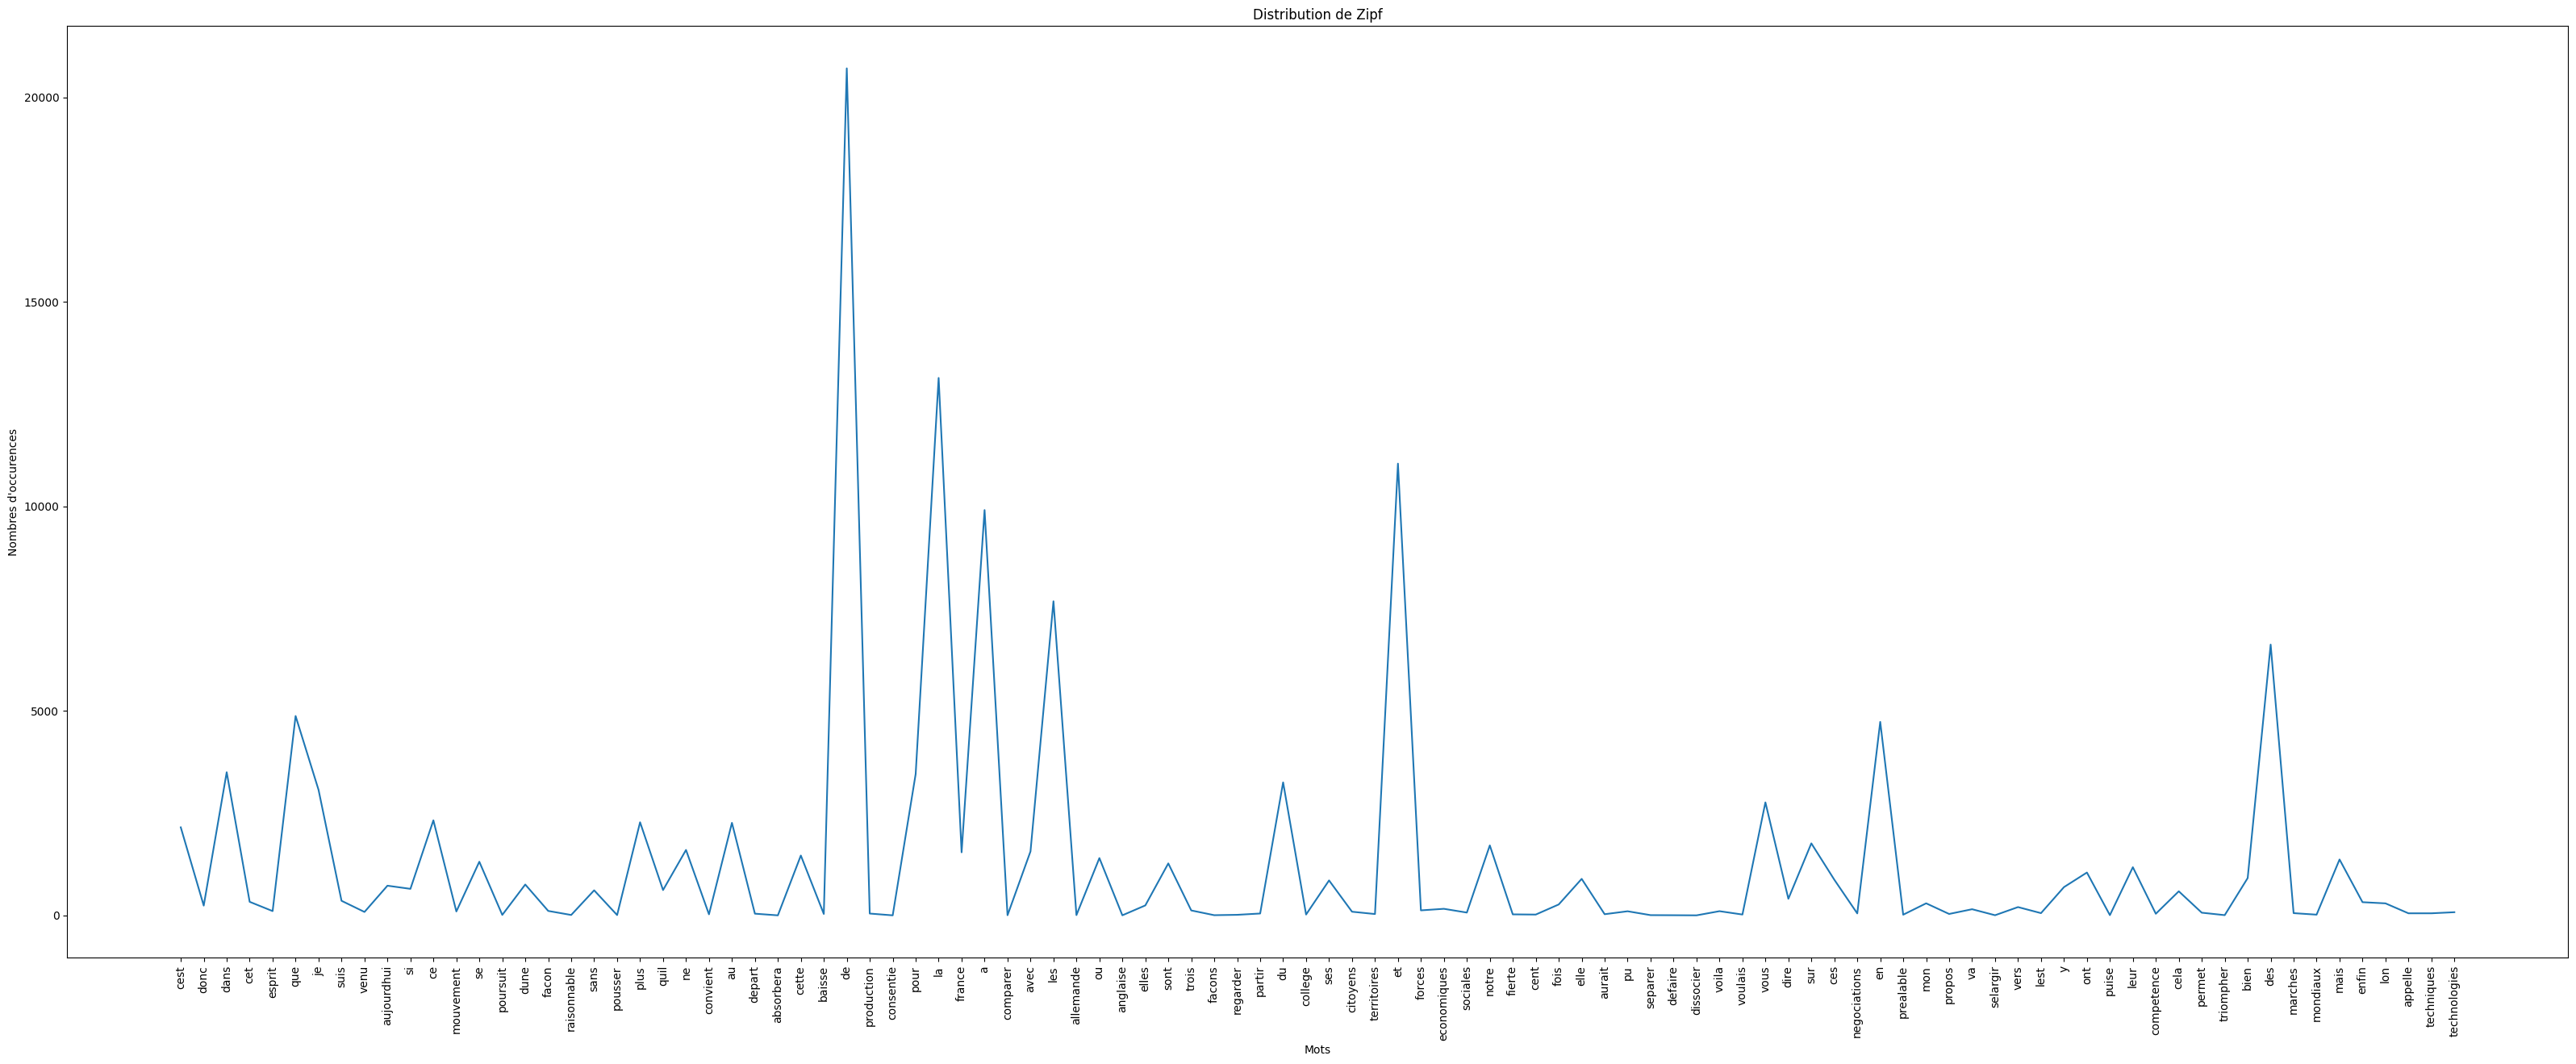

In [ ]:
distribution_zipf(X_test,100) 

#### 4.6 - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

In [ ]:
### BIGRAM = ( il fait planter le PC)
''' 
def bigrams(set) :
  X_train_bigrams = []
  most_frequent_bigrams =[]

  for sentence in set:
    X_train_bigrams.extend(list(bigrams(sentence.split())))
  most_frequent_bigrams = Counter(X_train_bigrams).most_common()
      
  liste_word_most_common = [mot for mot, freq in most_frequent_bigrams]
  liste_freq = [freq for mot, freq in most_frequent_bigrams]    
  liste_freq  = liste_freq[:100]
  liste_word_most_common  = liste_word_most_common[:100]

  ngramm = []
  for words in liste_word_most_common:
    ngramm.append(words[0]+'_'+words[1])

  words = ' '.join([str(elem) for elem in ngramm])
  return words
  
bigrams(X_train)
bigrams(X_test)

'''

" \ndef bigrams(set) :\n  X_train_bigrams = []\n  most_frequent_bigrams =[]\n\n  for sentence in set:\n    X_train_bigrams.extend(list(bigrams(sentence.split())))\n  most_frequent_bigrams = Counter(X_train_bigrams).most_common()\n      \n  liste_word_most_common = [mot for mot, freq in most_frequent_bigrams]\n  liste_freq = [freq for mot, freq in most_frequent_bigrams]    \n  liste_freq  = liste_freq[:100]\n  liste_word_most_common  = liste_word_most_common[:100]\n\n  ngramm = []\n  for words in liste_word_most_common:\n    ngramm.append(words[0]+'_'+words[1])\n\n  words = ' '.join([str(elem) for elem in ngramm])\n  return words\n  \nbigrams(X_train)\nbigrams(X_test)\n\n"

In [ ]:
### TRIGRAM
'''
def trigrams(set) :
  X_train_bigrams = []
  most_frequent_bigrams =[]

  for sentence in set:
    X_train_bigrams.extend(list(trigrams(sentence.split())))
  most_frequent_bigrams = Counter(X_train_bigrams).most_common()
      
  liste_word_most_common = [mot for mot, freq in most_frequent_bigrams]
  liste_freq = [freq for mot, freq in most_frequent_bigrams]    
  liste_freq  = liste_freq[:100]
  liste_word_most_common  = liste_word_most_common[:100]

  ngramm = []
  for words in liste_word_most_common:
    ngramm.append(words[0]+'_'+words[1])

  words = ' '.join([str(elem) for elem in ngramm])
  return words
  
trigrams(X_train)
trigrams(X_test)

'''

"\ndef trigrams(set) :\n  X_train_bigrams = []\n  most_frequent_bigrams =[]\n\n  for sentence in set:\n    X_train_bigrams.extend(list(trigrams(sentence.split())))\n  most_frequent_bigrams = Counter(X_train_bigrams).most_common()\n      \n  liste_word_most_common = [mot for mot, freq in most_frequent_bigrams]\n  liste_freq = [freq for mot, freq in most_frequent_bigrams]    \n  liste_freq  = liste_freq[:100]\n  liste_word_most_common  = liste_word_most_common[:100]\n\n  ngramm = []\n  for words in liste_word_most_common:\n    ngramm.append(words[0]+'_'+words[1])\n\n  words = ' '.join([str(elem) for elem in ngramm])\n  return words\n  \ntrigrams(X_train)\ntrigrams(X_test)\n\n"

### Modèles de Machine Learning


#### Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?

In [ ]:
X_train = [text for text in X_train]
y_train = [pol for pol in y_train]
test_corpus= [text for text in X_test]
test_classes = [pol for pol in y_test]

In [ ]:
word,nb_time,lr_time,svm_time=[],[],[],[]

liste = [100,250,500,750,1000,1500,2000,2500,5000,7500,10000]
for i in liste : 
    for sentence in X_train:
        word += sentence.split()

    dico = Counter(word)  
    liste_word_most_common=[mot for mot,freq in dico.most_common(i)]
    liste_freq= [freq for mot,freq in dico.most_common()]   
    
    vectorizer = CountVectorizer(stop_words = liste_word_most_common)
    X1= vectorizer.fit_transform(X_train)
    dic_size = np.shape(X1.toarray()[1])
    X_test = vectorizer.transform(test_corpus) 

    ### Naive Bayesien 
    start_nb = time.time()
    nb_clf =  MultinomialNB()
    nb_clf.fit(X1, y_train)
    end_nb = time.time()
    nb_time.append(end_nb - start_nb)

    ### SVM 
    start_svm = time.time()
    svm_clf = LinearSVC()
    svm_clf.fit(X1, y_train)
    end_svm = time.time()
    svm_time.append(end_svm - start_svm)
    
    #### regression logistique 
    start_lr = time.time()
    lr_clf = LogisticRegression()
    lr_clf.fit(X1, y_train)
    end_lr = time.time()
    lr_time.append(end_lr - start_lr)

    i += 1

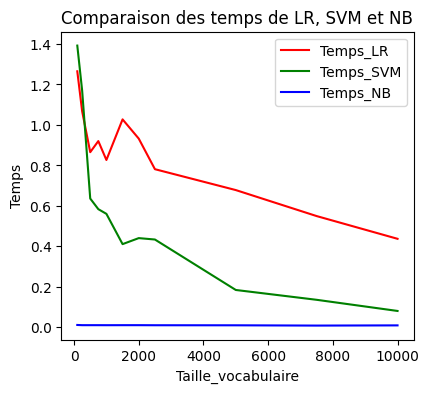

In [ ]:
resultats_simple_split_vocSize= pd.DataFrame({'Taille du vocabulaire':liste,'Temps_LR':lr_time,'Temps_SVM':svm_time,'Temps_NB':nb_time})

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(liste,lr_time, 'r', label = 'Temps_LR')
plt.plot(liste, svm_time , 'g', label = 'Temps_SVM')
plt.plot(liste, nb_time, 'b', label = 'Temps_NB')
plt.xlabel('Taille_vocabulaire')
plt.ylabel('Temps')
plt.title('Comparaison des temps de LR, SVM et NB')
plt.legend()

plt.show()

La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple split?
<font color=orange>

- Accuracy
- f1_score
- cross_val_score (accuracy)
- Kfold 

<font>

In [ ]:
liste_mod = ['NB','SVM','LR']
word,nb_time,lr_time,svm_time,acc_nb,f1_nb=[],[],[],[],[],[]

vectorizer = CountVectorizer()
X1= vectorizer.fit_transform(X_train)
dic_size = np.shape(X1.toarray()[1])
X_test = vectorizer.transform(test_corpus) 

### Naive Bayesien 
nb_clf =  MultinomialNB()
nb_clf.fit(X1, y_train)
pred_nb = nb_clf.predict(X_test)   

### SVM 
svm_clf = LinearSVC()
svm_clf.fit(X1, y_train)
pred_svm = svm_clf.predict(X_test)   
    
#### regression logistique 
lr_clf = LogisticRegression()
lr_clf.fit(X1, y_train)
pred_lr = lr_clf.predict(X_test)   

acc = [accuracy_score(test_classes, pred_nb),accuracy_score(test_classes, pred_svm),accuracy_score(test_classes, pred_lr)]
f1 = [f1_score(test_classes, pred_nb),f1_score(test_classes, pred_svm),f1_score(test_classes, pred_lr)]
cvs = [cross_val_score(nb_clf, X1,y_train, cv=5).mean(),cross_val_score(svm_clf, X1,y_train, cv=5).mean(),cross_val_score(lr_clf, X1,y_train, cv=5).mean()]


In [ ]:
result_simplep_split_CVS = pd.DataFrame({'Scoring':liste_mod,'Simplesplit - Accuracy':acc,'Simple_split - f1score':f1,'Cross_val_score':cvs})

TypeError: 'dict' object is not callable

Kfold  

In [ ]:
corpus = trainalltxts
label = trainalllabs
k_liste,svm_acc, svm_f1, lr_acc, lr_f1, nb_acc, nb_f1 = [],[],[],[],[],[],[]

# Create the KFold object
for n_split in range(3,10):
    kf = KFold(n_splits=n_split, shuffle=False)
    svm_acc_split,svm_f1_split,nb_acc_split,nb_f1_split,lr_acc_split,lr_f1_split=[],[],[],[],[],[]
# Iterate over the splits
    for train_index, test_index in kf.split(corpus):
        X_train_split = [corpus[i] for i in train_index]
        X_test_split = [corpus[i] for i in test_index]
        y_train_split = [label[i] for i in train_index]
        y_test_split =[label[i] for i in test_index]

        vectorizer = CountVectorizer()
        X= vectorizer.fit_transform(X_train_split)
        X_test= vectorizer.transform(X_test_split)
        #X2.reshape(1,-1)

        nb= MultinomialNB()
        nb.fit(X,y_train_split)
                
        svm = LinearSVC()
        svm.fit(X,y_train_split)
                            
        lr= LogisticRegression()
        lr.fit(X,y_train_split)
            
        # predicting the model on test set
        pred_svm = svm.predict(X_test)
        pred_nb= nb.predict(X_test)
        pred_lr = lr.predict(X_test)
                
        # score
        score_acc = accuracy_score(y_test_split, pred_svm)
        score_f1 = f1_score(y_test_split, pred_svm)
        svm_acc_split.append(score_acc)
        svm_f1_split.append(score_f1)

        score_acc = accuracy_score(y_test_split, pred_nb)
        score_f1 = f1_score(y_test_split, pred_nb)
        nb_acc_split.append(score_acc)
        nb_f1_split.append(score_f1)
                    
        score_acc = accuracy_score(y_test_split, pred_lr)
        score_f1 = f1_score(y_test_split, pred_lr)
        lr_acc_split.append(score_acc)
        lr_f1_split.append(score_f1)
        n_split += 1 

    svm_acc.append(sum(svm_acc_split)/len(svm_acc_split))
    svm_f1.append(sum(svm_f1_split)/len(svm_f1_split))
    lr_acc.append(sum(svm_acc_split)/len(svm_acc_split))
    lr_f1.append(sum(svm_f1_split)/len(svm_f1_split))
    nb_acc.append(sum(svm_acc_split)/len(svm_acc_split))
    nb_f1.append(sum(svm_f1_split)/len(svm_acc_split))

In [299]:
result_Kfold = pd.DataFrame({'NB_split':range(3,10),'ACCURACY_SVM':svm_acc,'ACCURACY_LR':lr_acc,'ACCURACY_nb':nb_acc,'f1score_SVM':svm_f1,'f1score_LR':lr_f1,'f1score_NB':nb_f1})

TypeError: 'dict' object is not callable

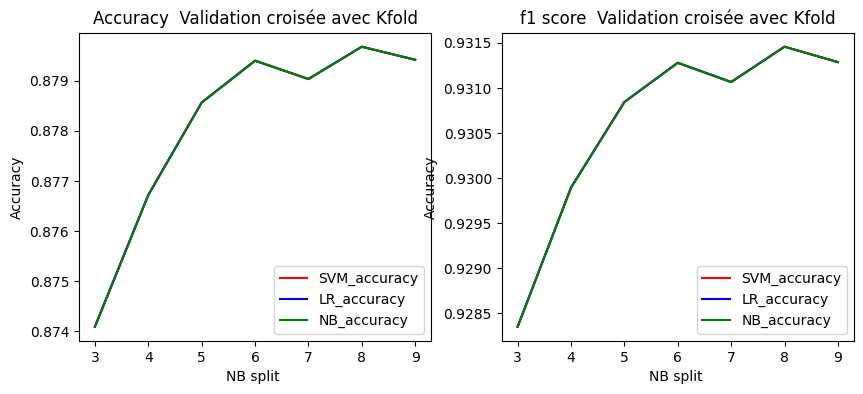

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(range(3,10), svm_acc, 'r', label = 'SVM_accuracy')
plt.plot(range(3,10), lr_acc, 'b', label = 'LR_accuracy')
plt.plot(range(3,10), nb_acc, 'g', label = 'NB_accuracy')
plt.xlabel('NB split ')
plt.ylabel('Accuracy')
plt.title('Accuracy  Validation croisée avec Kfold')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(3,10), svm_f1, 'r', label = 'SVM_accuracy')
plt.plot(range(3,10), lr_f1, 'b', label = 'LR_accuracy')
plt.plot(range(3,10), nb_f1, 'g', label = 'NB_accuracy')
plt.xlabel('NB split ')
plt.ylabel('Accuracy')
plt.title('f1 score  Validation croisée avec Kfold')
plt.legend()



In [ ]:
result_simplep_split_CVS
result_Kfold

TypeError: 'dict' object is not callable

###  ------------------------------------------

### Première campagne d'expériences
Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente)

<font color=orange> Les paramètres de régularisation sont testés sur 

Countvectorizer --> paramètres : **min_df,max_df, nrgram_range,max_feature,stop_words**)

Hyperparamètres testés pour chaque modèle :
-  Naive_Bayesien : alpha
-  Regression logistique: solver,penalty , C 
-  SVM : C <font>

<font color=orange> Re-importation du Dataset </font>

In [ ]:
path_train= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.learn.utf8"
trainalltxts,trainalllabs = load_pres(path_train)

path_test= r"C:\Users\actou\OneDrive\Documents\IODAA\ONTO-TAL\TAL\tuto_TAL-main\notebooks\ressources\AFDpresidentutf8\corpus.tache1.test.utf8"
testalltxts,testalllabs = load_pres(path_test)

### Validation par simple split : 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainalltxts, trainalllabs, test_size=0.33, random_state=42) 

X_train = [text for text in X_train]
y_train = [pol for pol in y_train]
test_corpus= [text for text in X_test]
test_classes = [pol for pol in y_test]

<font color=orange> **Requilibrage du dataset**:  
Dans la première partie du projet, on a pu observer un déséquilibre au sein de la répartition des étiquettes (86% / 13,9%). On procède donc à un **oversampling** du dataset minoritaire.

On commence par explorer différent niveux d'oversampling </font>

In [ ]:
index_etiquettes_neg = np.where((np.array(y_train)!=(1)))
X_train_neg, y_train_neg = X_train.copy(), y_train.copy()
for i in sorted(index_etiquettes_neg[0],reverse = True):
    del (y_train_neg [i],X_train_neg[i])

index_etiquettes_pos = np.where((np.array(y_train)==1))
X_train_pos,y_train_pos= X_train.copy(),y_train.copy()
for i in sorted(index_etiquettes_pos[0],reverse = True):
    del (y_train_pos [i],(X_train_pos [i]))

liste_l,liste_j,len_neg,len_pos = [],[],[],[]

for j in [2,3,4,5]:
    X_train_balanced_neg,y_train_balanced_neg = X_train_neg,y_train_neg 
    list_pos= [k for k in range(len(X_train_neg))]
    for i in sorted(rd.sample(list_pos,int(len(X_train_neg)/2)), reverse=True):
        del (X_train_balanced_neg[i],y_train_balanced_neg[i])

    X_new_train,y_new_train = (j*X_train_pos + X_train_balanced_neg),(j*y_train_pos + y_train_balanced_neg)
    liste_j.append(j)
    len_neg.append(sum(np.array(y_new_train)==1)/len(y_new_train)*100)
    len_pos.append(sum(np.array(y_new_train)!=1)/len(y_new_train)*100)
    j +=1

<font color=orange> On choisit donc de multiplier la classe minoraitaire par **3**</font>

In [ ]:
X_train_balanced ,y_train_balanced  = (X_train_pos + 3*X_train_balanced_neg),(y_train_pos + 3*y_train_balanced_neg)

<font color=orange>  Pour compenser le léger déquilibre et favoriser l'optimisation des paramètres et hyperparamètres des modeles, on **switch les etiquettes** -1 et 1  </font>

In [ ]:
def reverse_label(y_train_balanced) :
    y_train_new, liste_n,liste_o = [] ,[],[]

    for i in y_train_balanced: 
            if i == 1 :
                y_train_new.append(-1)
            else : 
                y_train_new.append(1)

    for i in y_train_new : 
            if i == 1 : 
                liste_n.append(i)  

    for i in y_train_balanced: 
            if i == 1 : 
                liste_o.append(i)  
                
    print("OLD SET") 
    print("La proportion d'etiquettes 1 est de:", (len(liste_o)/(len(y_train_balanced))*100),"%") 
    print("La proportion d'etiquettes -1 est de:", (100-(len(liste_o)/(len(y_train_balanced))*100)),"%")

    print("NEW SET") 
    print("La proportion d'etiquettes 1 est de:", (len(liste_n)/(len(y_train_new))*100),"%") 
    print("La proportion d'etiquettes -1 est de:", (100-(len(liste_n)/(len(y_train_new))*100)),"%")

In [ ]:
reverse_label(y_train_balanced)

OLD SET
La proportion d'etiquettes 1 est de: 55.30149201024101 %
La proportion d'etiquettes -1 est de: 44.69850798975899 %
NEW SET
La proportion d'etiquettes 1 est de: 44.69850798975899 %
La proportion d'etiquettes -1 est de: 55.30149201024101 %


<font color=orange> On travaille désormais avec les set suivants : 

- **Training set** :  X_train_balanced et X_test_balanced 
- **Validation set** : test_corpus et test_classes 
- **Test set** : testalltxts et testalllabs 

</font>

<font color=orange>
On pré-traite les dataset avant d'utiliser *Countvectrizer()*: 

La fonction de **prétraitement** permet : 
- Enlever la ponctuation 
- Mettre le texte en minuscule 
- Enlever les accents 
- Normaliser les caractères 
- Enlever les chiffres 

</font>

------------------
<font color=orange>
On a comparé les performances :
- en pré-traitant  avec cette fonction les données avant d'utiliser CountVectorizer
- en utilisant les paramètres strip_accent='ascii' et preprocessor = preprocess. Avec preprocess: une fonction qui permet d'enlever la ponctuation et mettre le texte en minuscule : 
</font>

In [ ]:
def preprocess(corpus):
    corpus= corpus.lower()
    ponctuation = string.punctuation  
    ponctuation += '\n'
    corpus = corpus.translate(str.maketrans(ponctuation, ' ' * len(ponctuation)))  

    return(corpus)

<font color=orange>
--> CONCLUSION = Nous n'observons pas de différences de perforamances

Pour la suite du projet, les dataset utilisés seront donc prétraités avant l'optimiation des paramètres te hyperparamètres 
</font>

In [ ]:
X_train_balanced = [pretraitement(i) for i in X_train_balanced]
print("Taille X_train apres le prétraitement:", len(X_train_balanced))
print("-----------")
print(X_train [:5])

Taille X_train apres le prétraitement: 11327
-----------
[' Les grands défis qui nous attendent, nous les relèverons si nous sommes unis et solidaires.\n', " Un réseau dense d'engagements réciproques est tissé.\n", " <nom> d'Arvor, puis vous-même, vous avez cité des étapes.\n", ' Elle sera pour les départements du Massif central un outil incomparable de développement.\n', ' Les pays industrialisés se sont engagés à réduire leurs émissions de gaz à effet de serre.\n']


In [ ]:
test_corpus= [pretraitement(i) for i in test_corpus]
print("Taille X_train apres le prétraitement:", len(X_test))
print("-----------")
print(test_corpus [:5])

Taille X_train apres le prétraitement: 18947
-----------
[' de mener a bien dans lequite dans le dialogue dans le respect les changements dont la france a besoin\n', ' tout cela nest pas exact\n', ' cest tout le merite du maitre douvrage et des architectes auxquels il a fait appel que davoir su maitriser avec autant delegance cet ensemble de contraintes techniques\n', ' a lenraciner dans les esprits et dans les coeurs\n', ' nos deux pays qui travaillent la main dans la main veulent que leurope du xxie siecle soit celle des hommes\n']


##### <font color=orange> Optimisation des paramètres de *Countvectorizer()* </font>

--> stop_words : 100 à 7500 

In [ ]:
from collections import Counter
def stop_word(set,nombre):
    word=[]
    for sentence in set:
            word += sentence.split()
    
    dico = Counter(word)       
    liste_most_common=[mot for mot,freq in dico.most_common(nombre)]
    
    return liste_most_common
    
liste_100 =stop_word(X_train,100) 
liste_500 = stop_word(X_train_balanced,500)
liste_750 = stop_word(X_train_balanced,750)
liste_1000 = stop_word(X_train_balanced,1000)
liste_1500 = stop_word(X_train_balanced,1500)
liste_2000 = stop_word(X_train_balanced,2000)
liste_3000 = stop_word(X_train_balanced,3000)
liste_5000 = stop_word(X_train_balanced,5000)
liste_7500 = stop_word(X_train_balanced,7500)

In [ ]:
liste_dic_size =[]
word,nb_time, lr_time,svm_time,acc_svm,f1_svm,acc_nb,f1_nb,acc_lr,f1_lr,cv_nb,cv_lr,cv_svm = [],[],[],[],[],[],[],[],[],[],[],[],[]
liste_size = [100,500,750,1000,1500,2000,3000,5000,7500]

for i in [liste_100,liste_500,liste_750,liste_1000,liste_1500,liste_2000,liste_3000,liste_5000,liste_7500] : 
    vectorizer= CountVectorizer(stop_words = i)
    X1= vectorizer.fit_transform(X_train_balanced)
    X_test = vectorizer.transform(test_corpus) 
    liste_dic_size.append(dic_size)

        ### Naive Bayesien 
    start_nb = time.time() 
    nb_clf =  MultinomialNB()
    nb_clf.fit(X1, y_train_balanced)
    end_nb = time.time()
    nb_time.append(end_nb - start_nb)

    pred_nb = nb_clf.predict(X_test)    
    acc_nb.append(accuracy_score(test_classes, pred_nb))
    f1_nb.append(f1_score(test_classes, pred_nb))
    a = cross_val_score(nb_clf, X1,y_train_balanced, cv=5)
    cv_nb.append(a.mean())

        ### SVM 
    start_svm = time.time()
    svm_clf = LinearSVC()
    svm_clf.fit(X1, y_train_balanced)
    end_svm = time.time()
    svm_time.append(end_svm - start_svm)
        
    pred_svm = svm_clf.predict(X_test)
    acc_svm.append(accuracy_score(test_classes, pred_svm))
    f1_svm.append(f1_score(test_classes, pred_svm))
    a = cross_val_score(svm_clf, X1,y_train_balanced, cv=5)
    cv_svm.append(a.mean())

        #### regression logistique 
    start_lr = time.time()
    lr_clf = LogisticRegression()
    lr_clf.fit(X1,y_train_balanced)
    end_lr = time.time()
    lr_time.append(end_lr - start_lr)

    pred_lr = lr_clf.predict(X_test)
    acc_lr.append(accuracy_score(test_classes, pred_lr))
    f1_lr.append(f1_score(test_classes, pred_lr))
    a = cross_val_score(lr_clf,X1,y_train_balanced, cv=5)
    cv_lr.append(a.mean())

In [ ]:
result_stopword = pd.DataFrame({'Nombre de mots':liste_size,'Taille dico':liste_dic_size,'Temps_LR':lr_time,'Accuracy_LR':acc_lr,'f1score_LR':f1_lr,'CV_score_LR':cv_lr,
                                                'Temps_SVM':svm_time,'Accuracy_SVM':acc_svm,'f1score_SVM':f1_svm,'CV_score_SVM':cv_svm,
                                                'Temps_NB':nb_time,'Accuracy_NB':acc_nb,'f1score_NB':f1_nb,'CV_score_NB':cv_lr,})
result_stopword

,Nombre de mots,Taille dico,Temps_LR,Accuracy_LR,f1score_LR,CV_score_LR,Temps_SVM,Accuracy_SVM,f1score_SVM,CV_score_SVM,Temps_NB,Accuracy_NB,f1score_NB,CV_score_NB
0,100,"(27643,)",1.048647,0.700322,0.799958,0.886731,0.940510,0.613606,0.724619,0.897590,0.011944,0.709083,0.806066,0.886731
1,500,"(27643,)",0.483843,0.658468,0.767456,0.864307,0.496779,0.591070,0.707402,0.877461,0.005633,0.682905,0.787222,0.864307
2,750,"(27643,)",0.573551,0.648652,0.759961,0.853359,0.433335,0.586953,0.704612,0.864307,0.005008,0.673985,0.780856,0.853359
3,1000,"(27643,)",0.530782,0.641157,0.754593,0.842148,0.435048,0.583997,0.702701,0.853095,0.001996,0.662585,0.771964,0.842148
4,1500,"(27643,)",0.603831,0.636723,0.752383,0.821048,0.408531,0.593973,0.713813,0.829964,0.013525,0.651132,0.763455,0.821048
5,2000,"(27643,)",0.732780,0.645221,0.761123,0.800831,0.305471,0.602998,0.724226,0.815221,0.009256,0.641262,0.755969,0.800831
6,3000,"(27643,)",0.887895,0.665382,0.779968,0.764458,0.174649,0.625957,0.747101,0.776907,0.006017,0.647543,0.763778,0.764458
7,5000,"(27643,)",0.177042,0.687497,0.800714,0.702395,0.168694,0.671980,0.789158,0.703013,0.010014,0.658943,0.776741,0.702395
8,7500,"(27643,)",0.132878,0.727609,0.833768,0.606958,0.070079,0.711669,0.821954,0.624526,0.000000,0.761493,0.858856,0.606958


In [ ]:
df_LR = result_stopword.sort_values(by = 'CV_score_LR', ascending = False)
df_SVM = result_stopword.sort_values(by = 'CV_score_SVM', ascending = False)
df_NB = result_stopword.sort_values(by = 'CV_score_NB', ascending = False)

print("Selon CROSS VAL SCORE")
print("--> LR : Nombre de mots = liste_",df_LR.iloc[0,0])
print("--> SVM : Nombre de mots = liste_",df_SVM.iloc[0,0])
print("--> NB : Nombre de mots = liste_",df_NB.iloc[0,0])

Selon CROSS VAL SCORE
--> LR : Nombre de mots = liste_ 100
--> SVM : Nombre de mots = liste_ 100
--> NB : Nombre de mots = liste_ 100


--> min_df: entre 1 et 20 
--> max_df : 0.005, 0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9

In [ ]:
liste_min,liste_max=[],[]

max_liste = [0.005, 0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9]
nb_time, lr_time,svm_time,acc_svm,f1_svm,acc_nb,f1_nb,acc_lr,f1_lr,cv_nb,cv_lr,cv_svm,liste_min,liste_max = [],[],[],[],[],[],[],[],[],[],[],[],[],[]

for min in range(20):
    for max in max_liste:
        vectorizer  = CountVectorizer(max_df=max, min_df =min,stop_words = liste_100)
        X1 = vectorizer.fit_transform(X_train_balanced)
        X_test = vectorizer.transform(test_corpus)

        ### Naive Bayesien 
        start_nb = time.time() 
        nb_clf =  MultinomialNB()
        nb_clf.fit(X1, y_train_balanced)
        end_nb = time.time()
        nb_time.append(end_nb - start_nb)

        pred_nb = nb_clf.predict(X_test)    
        acc_nb.append(accuracy_score(test_classes, pred_nb))
        f1_nb.append(f1_score(test_classes, pred_nb))
        a = cross_val_score(nb_clf, X1,y_train_balanced, cv=5)
        cv_nb.append(a.mean())

        ### SVM 
        start_svm = time.time()
        svm_clf = LinearSVC()
        svm_clf.fit(X1, y_train_balanced)
        end_svm = time.time()
        svm_time.append(end_svm - start_svm)
        
        pred_svm = svm_clf.predict(X_test)
        acc_svm.append(accuracy_score(test_classes, pred_svm))
        f1_svm.append(f1_score(test_classes, pred_svm))
        a = cross_val_score(svm_clf, X1,y_train_balanced, cv=5)
        cv_svm.append(a.mean())

            #### regression logistique 
        start_lr = time.time()
        lr_clf = LogisticRegression()
        lr_clf.fit(X1, y_train_balanced)
        end_lr = time.time()
        lr_time.append(end_lr - start_lr)

        pred_lr = lr_clf.predict(X_test)
        acc_lr.append(accuracy_score(test_classes, pred_lr))
        f1_lr.append(f1_score(test_classes, pred_lr))
        a = cross_val_score(lr_clf, X1,y_train_balanced, cv=5, scoring = "accuracy")
        cv_lr.append(a.mean())
        
        min += 1 
        liste_min.append(min)
        liste_max.append(max)


In [ ]:
result_min_max_df= pd.DataFrame({'Max':liste_min,'Min':liste_max,'Temps_LR':lr_time,'Accuracy_LR':acc_lr,'f1score_LR':f1_lr,'CV_score_LR':cv_lr,
                                               'Temps_SVM':svm_time,'Accuracy_SVM':acc_svm,'f1score_SVM':f1_svm,'CV_score_SVM':cv_svm,
                                               'Temps_NB':nb_time,'Accuracy_NB':acc_nb,'f1score_NB':f1_nb,'CV_score_NB':cv_lr,})
result_min_max_df

,Max,Min,Temps_LR,Accuracy_LR,f1score_LR,CV_score_LR,Temps_SVM,Accuracy_SVM,f1score_SVM,CV_score_SVM,Temps_NB,Accuracy_NB,f1score_NB,CV_score_NB
0,1,0.005,0.416779,0.657571,0.766703,0.862894,0.570001,0.590648,0.707100,0.876843,0.011345,0.682060,0.786504,0.862894
1,2,0.010,0.458634,0.667705,0.773737,0.873576,0.588066,0.590700,0.704853,0.883817,0.007475,0.689608,0.791284,0.873576
2,3,0.100,0.383073,0.696416,0.796591,0.895294,1.589681,0.599726,0.711196,0.910479,0.003342,0.686019,0.786107,0.895294
3,4,0.500,0.420894,0.697102,0.796670,0.899974,1.966394,0.594923,0.705882,0.917719,0.007067,0.682588,0.782700,0.899974
4,5,0.600,0.354414,0.709980,0.807429,0.885937,1.590604,0.616509,0.727047,0.904741,0.006481,0.712039,0.808090,0.885937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,23,0.500,0.137051,0.734945,0.829393,0.802685,0.714701,0.702222,0.804016,0.809218,0.002000,0.740803,0.832463,0.802685
156,24,0.600,0.113780,0.735473,0.829755,0.799418,0.591462,0.707447,0.808353,0.803656,0.002826,0.741384,0.832958,0.799418
157,25,0.700,0.117828,0.737373,0.831173,0.796328,1.013507,0.713939,0.813194,0.800831,0.003565,0.742123,0.833674,0.796328
158,26,0.800,0.133934,0.740064,0.833158,0.795269,0.558817,0.714625,0.813853,0.797388,0.002988,0.742387,0.833895,0.795269


In [ ]:
df_LR = result_min_max_df.sort_values(by = 'CV_score_LR', ascending = False)
df_SVM = result_min_max_df.sort_values(by = 'CV_score_SVM', ascending = False)
df_NB = result_min_max_df.sort_values(by = 'CV_score_NB', ascending = False)

print("Selon CROSS VAL SCORE")
print("--> LR : Paramètre max_df = ",df_LR.iloc[0,1], "et min_df = ",df_LR.iloc[0,0])
print("--> SVM : Paramètre max_df = ",df_SVM.iloc[0,1], "et min_df = ",df_SVM.iloc[0,0])
print("--> NB : Paramètre max_df = ",df_NB.iloc[0,1], "et min_df = ",df_NB.iloc[0,0])

Selon CROSS VAL SCORE
--> LR : Paramètre max_df =  0.5 et min_df =  4
--> SVM : Paramètre max_df =  0.5 et min_df =  4
--> NB : Paramètre max_df =  0.5 et min_df =  4


--> ngram : (1,3),(1,1),(1,2),(2,2),(2,3),(3,3)

In [ ]:
liste_ngram = [(1,3),(1,1),(1,2),(2,2),(2,3),(3,3)]

nb_time, lr_time,svm_time,acc_svm,f1_svm,acc_nb,f1_nb,acc_lr,f1_lr,cv_nb,cv_lr,cv_svm = [],[],[],[],[],[],[],[],[],[],[],[]

for i in liste_ngram : 
    vectorizer= CountVectorizer(min_df = 4, max_df = 0.5, ngram_range = i)
    X1= vectorizer.fit_transform(X_train_balanced)
    X_test = vectorizer.transform(test_corpus) 

        ### Naive Bayesien 
    start_nb = time.time() 
    nb_clf =  MultinomialNB()
    nb_clf.fit(X1, y_train_balanced)
    end_nb = time.time()
    nb_time.append(end_nb - start_nb)

    pred_nb = nb_clf.predict(X_test)    
    acc_nb.append(accuracy_score(test_classes, pred_nb))
    f1_nb.append(f1_score(test_classes, pred_nb))
    a = cross_val_score(nb_clf, X1,y_train_balanced, cv=5)
    cv_nb.append(a.mean())

        ### SVM 
    start_svm = time.time()
    svm_clf = LinearSVC()
    svm_clf.fit(X1, y_train_balanced)
    end_svm = time.time()
    svm_time.append(end_svm - start_svm)
        
    pred_svm = svm_clf.predict(X_test)
    acc_svm.append(accuracy_score(test_classes, pred_svm))
    f1_svm.append(f1_score(test_classes, pred_svm))
    a = cross_val_score(svm_clf, X1,y_train_balanced, cv=5)
    cv_svm.append(a.mean())

        #### regression logistique 
    start_lr = time.time()
    lr_clf = LogisticRegression()
    lr_clf.fit(X1, y_train_balanced)
    end_lr = time.time()
    lr_time.append(end_lr - start_lr)

    pred_lr = lr_clf.predict(X_test)
    acc_lr.append(accuracy_score(test_classes, pred_lr))
    f1_lr.append(f1_score(test_classes, pred_lr))
    a = cross_val_score(lr_clf, X1,y_train_balanced, cv=5, scoring = "accuracy")
    cv_lr.append(a.mean())

In [ ]:
results_ngram =pd.DataFrame({'Ngram':liste_ngram,'Temps_LR':lr_time,'Accuracy_LR':acc_lr,'f1score_LR':f1_lr,'CV_score_LR':cv_lr,
                                                'Temps_SVM':svm_time,'Accuracy_SVM':acc_svm,'f1score_SVM':f1_svm,'CV_score_SVM':cv_svm,
                                                'Temps_NB':nb_time,'Accuracy_NB':acc_nb,'f1score_NB':f1_nb,'CV_score_NB':cv_lr,})                                      
results_ngram

,Ngram,Temps_LR,Accuracy_LR,f1score_LR,CV_score_LR,Temps_SVM,Accuracy_SVM,f1score_SVM,CV_score_SVM,Temps_NB,Accuracy_NB,f1score_NB,CV_score_NB
0,"(1, 3)",0.879805,0.659629,0.763695,0.916572,1.620706,0.566686,0.676975,0.927784,0.005003,0.643110,0.747856,0.916572
1,"(1, 1)",0.183261,0.709980,0.807429,0.885937,0.654259,0.616509,0.727047,0.904741,0.003031,0.712039,0.808090,0.885937
2,"(1, 2)",0.782251,0.672666,0.775518,0.913217,1.076770,0.579036,0.689432,0.925577,0.003742,0.670502,0.772444,0.913217
3,"(2, 2)",0.571431,0.639837,0.749155,0.887614,0.324161,0.532274,0.644125,0.899091,0.002000,0.652927,0.759209,0.887614
4,"(2, 3)",0.480833,0.616773,0.727307,0.896796,0.508129,0.513379,0.623274,0.905182,0.003033,0.628965,0.737687,0.896796
5,"(3, 3)",0.043417,0.456062,0.562972,0.785380,0.146886,0.401699,0.494335,0.814603,0.003019,0.720272,0.822195,0.785380


In [ ]:
df_LR = results_ngram.sort_values(by = 'CV_score_LR', ascending = False)
df_SVM = results_ngram.sort_values(by = 'CV_score_SVM', ascending = False)
df_NB = results_ngram.sort_values(by = 'CV_score_NB', ascending = False)

print("--> LR : Paramètre max_df = ",df_LR.iloc[0,1], "et min_df = ",df_LR.iloc[0,0])
print("--> SVM : Paramètre max_df = ",df_SVM.iloc[0,1], "et min_df = ",df_SVM.iloc[0,0])
print("--> NB : Paramètre max_df = ",df_NB.iloc[0,1], "et min_df = ",df_NB.iloc[0,0])    

--> LR : Paramètre max_df =  0.879805326461792 et min_df =  (1, 3)
--> SVM : Paramètre max_df =  0.879805326461792 et min_df =  (1, 3)
--> NB : Paramètre max_df =  0.879805326461792 et min_df =  (1, 3)


--> max_feature : 1000,5000,10000,50000,100000

In [ ]:
liste_max_features = [1000,5000,10000,50000,100000]
nb_time, lr_time,svm_time,acc_svm,f1_svm,acc_nb,f1_nb,acc_lr,f1_lr,cv_nb,cv_lr,cv_svm = [],[],[],[],[],[],[],[],[],[],[],[]

for i in liste_max_features: 
    vectorizer= CountVectorizer(min_df = 4, max_df = 0.5, ngram_range = (1,3),max_features=i)
    X1= vectorizer.fit_transform(X_train_balanced)
    X_test = vectorizer.transform(test_corpus) 

        ### Naive Bayesien 
    start_nb = time.time() 
    nb_clf =  MultinomialNB()
    nb_clf.fit(X1, y_train_balanced)
    end_nb = time.time()
    nb_time.append(end_nb - start_nb)

    pred_nb = nb_clf.predict(X_test)    
    acc_nb.append(accuracy_score(test_classes, pred_nb))
    f1_nb.append(f1_score(test_classes, pred_nb))
    a = cross_val_score(nb_clf, X1,y_train_balanced, cv=5)
    cv_nb.append(a.mean())

        ### SVM 
    start_svm = time.time()
    svm_clf = LinearSVC()
    svm_clf.fit(X1, y_train_balanced)
    end_svm = time.time()
    svm_time.append(end_svm - start_svm)
        
    pred_svm = svm_clf.predict(X_test)
    acc_svm.append(accuracy_score(test_classes, pred_svm))
    f1_svm.append(f1_score(test_classes, pred_svm))
    a = cross_val_score(svm_clf, X1,y_train_balanced, cv=5)
    cv_svm.append(a.mean())

        #### regression logistique 
    start_lr = time.time()
    lr_clf = LogisticRegression()
    lr_clf.fit(X1, y_train_balanced)
    end_lr = time.time()
    lr_time.append(end_lr - start_lr)

    pred_lr = lr_clf.predict(X_test)
    acc_lr.append(accuracy_score(test_classes, pred_lr))
    f1_lr.append(f1_score(test_classes, pred_lr))
    a = cross_val_score(lr_clf, X1,y_train_balanced, cv=5, scoring = "accuracy")
    cv_lr.append(a.mean())

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 

In [ ]:
result_max_features = pd.DataFrame({'Max_features':liste_max_features,'Temps_LR':lr_time,'Accuracy_LR':acc_lr,'f1score_LR':f1_lr,'CV_score_LR':cv_lr,
                                                'Temps_SVM':svm_time,'Accuracy_SVM':acc_svm,'f1score_SVM':f1_svm,'CV_score_SVM':cv_svm,
                                                'Temps_NB':nb_time,'Accuracy_NB':acc_nb,'f1score_NB':f1_nb,'CV_score_NB':cv_lr,})
result_max_features 

,Max_features,Temps_LR,Accuracy_LR,f1score_LR,CV_score_LR,Temps_SVM,Accuracy_SVM,f1score_SVM,CV_score_SVM,Temps_NB,Accuracy_NB,f1score_NB,CV_score_NB
0,1000,0.132007,0.732781,0.828064,0.785204,0.571466,0.719111,0.817502,0.786881,0.002969,0.722806,0.819506,0.785204
1,5000,0.170718,0.691666,0.792837,0.893971,0.619669,0.602523,0.714854,0.905448,0.003004,0.722383,0.816763,0.893971
2,10000,0.694279,0.678735,0.780909,0.906066,0.858106,0.585845,0.697459,0.915953,0.004017,0.695308,0.794064,0.906066
3,50000,0.887636,0.659629,0.763695,0.916572,1.433317,0.566686,0.676975,0.927784,0.004984,0.643110,0.747856,0.916572
4,100000,0.854596,0.659629,0.763695,0.916572,1.257990,0.566686,0.676975,0.927784,0.004617,0.643110,0.747856,0.916572


In [ ]:
df_LR = result_max_features.sort_values(by = 'CV_score_LR', ascending = False)
df_SVM = result_max_features.sort_values(by = 'CV_score_SVM', ascending = False)
df_NB = result_max_features.sort_values(by = 'CV_score_NB', ascending = False)

print("--> LR : Paramètre max_features = ",df_LR.iloc[0,0])
print("--> SVM : Paramètre max_features = ",df_SVM.iloc[0,0])
print("--> NB : Paramètre max_features = ",df_NB.iloc[0,0])   

--> LR : Paramètre max_features =  50000
--> SVM : Paramètre max_features =  50000
--> NB : Paramètre max_features =  50000


<font color=orange>  Regardons les performances de tous les paramèètres testés pout CountVectorizer()</font>

#### <font color=orange> Optimisation des hyperparamètres des modèles avec *Gridsearch()*

On conserve les paramètres de *Counvectorizer()* suivants : 
- stop_words = /:Il ne semble pas y avoir d'effet de ce paramètres sur les performances 
-  min_df = **4**
- max_df  = **0,5**
- max_features = **50 000**
- ngram = **(1,3)**

<font>

In [ ]:
vectorizer_LR= CountVectorizer(min_df = 4, max_df = 0.5, ngram_range = (1,3),max_features= 50000) 
X_boost= vectorizer_LR.fit_transform(X_train_balanced)
X_test= vectorizer_LR.transform(test_corpus)

Modele Multinomial NB : Pour ce modèle uniquement,  on regarde l'effet du paramètre CV *Gridsearch()*. 
CV : entre 2 et 15 

In [ ]:
params_nb = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
liste_cv,liste_f1,liste_alpha,liste_cvs = [],[],[],[]

for i in range(2,15) :
    nb_clf = MultinomialNB()
    grid_search = GridSearchCV(nb_clf, param_grid=params_nb, scoring='f1', n_jobs=3 , cv = i)
    grid_search.fit(X_boost, y_train_balanced)
    grid_search.best_estimator_.score(X_boost,y_train_balanced)
    pred_nb=grid_search.predict(X_test)

    liste_f1.append(f1_score(test_classes,pred_nb))
    cross_val_score(lr_clf,X_boost,y_train_balanced, cv=5)
    liste_cvs.append(a.mean())
    liste_cv.append(i)
    liste_alpha.append(grid_search.best_params_['alpha'])
    i += 1

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

--> NB : Meilleur paramètre alpha 0.1 avec cross_val_score; 0.9165715666275045


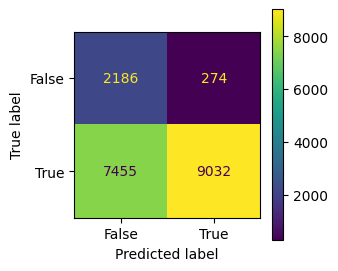

In [ ]:
result_nb=pd.DataFrame({"CV":liste_cv,"Alpha":liste_alpha,"f1_score":liste_f1,"cross_val_score":liste_cvs})[:3]
df_nb= result_nb.sort_values(by = 'cross_val_score', ascending = False)
print("--> NB : Meilleur paramètre alpha",df_nb.iloc[0,1] ,'avec cross_val_score;',df_nb.iloc[0,3])

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_classes,pred_nb), display_labels = [False, True])
fig, ax = plt.subplots(figsize=(3,3))
cm_display.plot(ax=ax)
plt.show()

Regression logistique avec *solver='lbfgs'*

In [ ]:
params = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':('l1','l2')}#,'solver':('liblinear','lbfgs')}

modele_lr = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
grid_search = GridSearchCV(modele_lr, param_grid=params, scoring='f1', n_jobs=3)
grid_search.fit(X_boost, y_train_balanced)
pred=grid_search.predict(X_test)
parameters_LR = grid_search.best_params_

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

Les meilleurs paramètres de LR  sont : {'C': 1000, 'penalty': 'l2'}
Cross_val_score 0.9165715666275045


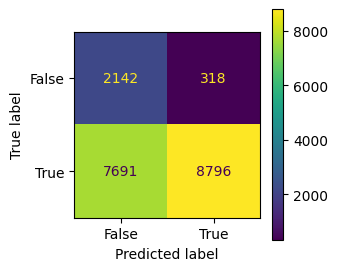

In [ ]:
print("Les meilleurs paramètres de LR  sont :",parameters_LR)
print("Cross_val_score",cross_val_score(modele_lr,X_boost,y_train_balanced).mean())
#print(classification_report(test_classes,pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_classes,pred), display_labels = [False, True])
fig, ax = plt.subplots(figsize=(3,3))
cm_display.plot(ax=ax)
plt.show()

Regression logistique avec *solver='liblinear'*

In [ ]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':('l1','l2')}

modele_LRlib = LogisticRegression(random_state=0, solver='liblinear',n_jobs= (-1))
grid_search = GridSearchCV(modele_LRlib, param_grid=params, scoring='f1', n_jobs=3)
grid_search.fit(X_boost, y_train_balanced)
pred=grid_search.predict(X_test)
parameters_LRlib = grid_search.best_estimator_

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


Les meilleurs paramètres de LR(liblinear) sont : LogisticRegression(C=1000, n_jobs=-1, random_state=0, solver='liblinear')


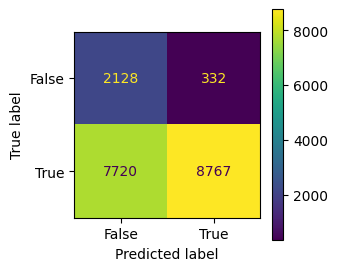

In [ ]:
print("Les meilleurs paramètres de LR(liblinear) sont :" ,parameters_LRlib)
#print("Cross_val_score",cross_val_score(modele_LRlib,X_boost,y_train_balanced).mean())

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_classes,pred), display_labels = [False, True])
fig, ax = plt.subplots(figsize=(3,3))
cm_display.plot(ax=ax)
plt.show()

SVM - Support vector machine 

In [ ]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

modele_SVM = LinearSVC(random_state=0, tol=1e-5)

grid_search = GridSearchCV(modele_SVM, param_grid=params, scoring='accuracy', n_jobs=3)
grid_search.fit(X_boost, y_train_balanced)
pred=grid_search.predict(X_test)
parameters_SVM = grid_search.best_estimator_

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Le meilleur paramètre de SVM est  -->  LinearSVC(C=1, random_state=0, tol=1e-05)


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 

Cross_val_score 0.9277840190628719


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


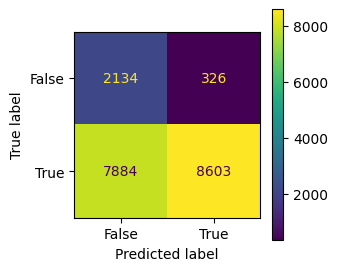

In [ ]:
print("Le meilleur paramètre de SVM est  --> " ,parameters_SVM)
print("Cross_val_score",cross_val_score(modele_SVM,X_boost,y_train_balanced).mean())
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_classes,pred), display_labels = [False, True])
fig, ax = plt.subplots(figsize=(3,3))
cm_display.plot(ax=ax)
plt.show()

## TEST  - Application des classifieurs sur le training test

 <font color=orange>  pretraitement de "testalltxts" <font>

In [ ]:
testalltxts = [pretraitement(i) for i in testalltxts]
print("Taille du set de test apres le prétraitement:" ,len(testalltxts))

Taille du set de test apres le prétraitement: 27162


In [ ]:
vectorizer = CountVectorizer(min_df = 4, max_df = 0.5, ngram_range = (1,3),max_features= 50000)#, preprocessor = preprocess,strip_accents = 'ascii') 
X = vectorizer.fit_transform(X_train_balanced)
X_test = vectorizer.transform(testalltxts)

In [ ]:
### NB 
nb_clf= MultinomialNB(alpha = 0.01)
nb_clf.fit(X, y_train_balanced)
pred_nb = nb_clf.predict(X_test)

# LR
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=3, C= 0.001, penalty = 'l2')
lr_clf.fit(X, y_train_balanced)
pred_lr = lr_clf.predict(X_test)

# LR - lib 
lr_clflib = LogisticRegression(C=0.001, n_jobs=3, random_state=0, solver='liblinear')
lr_clflib.fit(X, y_train_balanced)
pred_lrlib = lr_clflib.predict(X_test)

# SVM 
svm_clf = LinearSVC(C=0.001, random_state=0, tol=1e-05)
svm_clf.fit(X, y_train_balanced)
pred_svm = svm_clf.predict(X_test)

C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(


In [ ]:
print("NB : ", nb_clf.score(X_test,testalllabs))
print("LR : " , lr_clf.score(X_test,testalllabs))
print("LR (liblinear): " ,lr_clflib.score(X_test,testalllabs))
print("SVM: ", svm_clf.score(X_test,testalllabs))

NB :  0.5002208968411752
LR :  0.8006774169796038
LR (liblinear):  0.7587070171563214
SVM:  0.7469626684338414


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


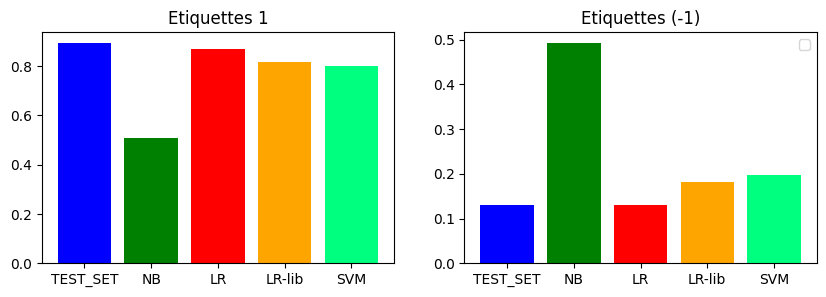

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Etiquettes 1")
plt.bar(x=["TEST_SET"], height=sum(np.array(testalllabs)==1)/len(testalllabs), color='blue', label='Real')
plt.bar(x=["NB"], height=sum(pred_nb==1)/len(pred_nb), color='green', label='NB')
plt.bar(x=["LR"], height=sum(pred_lr==1)/len(pred_lr), color='red', label='LR')
plt.bar(x=["LR-lib"], height=sum(pred_lrlib==1)/len(pred_lrlib), color='orange', label='LR-liblinear')
plt.bar(x=["SVM"], height=sum(pred_svm==1)/len(pred_svm), color='springgreen', label='SVM')

plt.subplot(1,2,2)
plt.title("Etiquettes (-1)")
plt.bar(x=["TEST_SET"], height=sum(np.array(y_test)!=1)/len(y_test), color='blue')
plt.bar(x=["NB"], height=sum(pred_nb!=1)/len(pred_nb), color='green')
plt.bar(x=["LR"], height=sum(pred_lr!=1)/len(pred_lr), color='red')
plt.bar(x=["LR-lib"], height=sum(pred_lrlib!=1)/len(pred_lrlib), color='orange')
plt.bar(x=["SVM"], height=sum(pred_svm!=1)/len(pred_nb), color='springgreen')
plt.legend()

plt.show()

#### <font color=orange>POST-traitement :  Corriger le dataset afin d'enlever les exeptions '-1 'et ' 1 ' intégrés dans des blocs de phrases 

On considère qu'une etiquette -1 comprise entre 1 et 1 est une exeption =, ele ets transformée en 1 et inversement <font>


In [ ]:
y_train_corr = [0]*len(testalllabs)
y_train_corr[0] = testalllabs[0]
y_train_corr[-1] = testalllabs[-1]

for i in range(2, len(testalllabs)-1):
        if testalllabs[i-1] == testalllabs[i+1] == 1:
            y_train_corr[i] = 1
        elif testalllabs[i-1] == testalllabs[i+1] == -1:
            y_train_corr[i] = -1
        else : y_train_corr[i] = testalllabs[i]

In [ ]:
print(" AVANT ")  
print ("Taille du test_set ==> ", len(testalllabs))       
print("La proportion d'etiquettes 1 est de:", (sum(np.array(testalllabs)==1)/len(testalllabs))*100)
print("La proportion d'etiquettes -1 est de:", (100 - sum(np.array(testalllabs)==1)/len(testalllabs)*100))      

print(" APRES")   
print ("Taille test_set corrigé ==> ", len(y_train_corr))       
print("La proportion d'etiquettes 1 est de:", (sum(np.array(y_train_corr)==1)/len(y_train_corr))*100)
print("La proportion d'etiquettes -1 est de:", (100 - sum(np.array(y_train_corr)==1)/len(testalllabs)*100))  

 AVANT 
Taille du test_set ==>  27162
La proportion d'etiquettes 1 est de: 89.2570502908475
La proportion d'etiquettes -1 est de: 10.742949709152498
 APRES
Taille test_set corrigé ==>  27162
La proportion d'etiquettes 1 est de: 96.07908106914071
La proportion d'etiquettes -1 est de: 3.920918930859287


In [ ]:
### NB 
nb_clf= MultinomialNB(alpha = 0.01)
nb_clf.fit(X, y_train_balanced)
pred_nb = nb_clf.predict(X_test)

# LR
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=3, C= 0.001, penalty = 'l2')
lr_clf.fit(X, y_train_balanced)
pred_lr = lr_clf.predict(X_test)

lr_clflib = LogisticRegression(C=0.001, n_jobs=3, random_state=0, solver='liblinear')
lr_clflib.fit(X, y_train_balanced)
pred_lrlib = lr_clflib.predict(X_test)

# SVM 
svm_clf = LinearSVC(C=0.001, random_state=0, tol=1e-05)
svm_clf.fit(X, y_train_balanced)
pred_svm = svm_clf.predict(X_test)


C:\Users\actou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(


In [ ]:
print("NB : ", nb_clf.score(X_test,testalllabs))
print("LR : " , lr_clf.score(X_test,testalllabs))
print("LR (liblinear): " ,lr_clflib.score(X_test,testalllabs))
print("SVM: ", svm_clf.score(X_test,testalllabs))

NB :  0.5002208968411752
LR :  0.8006774169796038
LR (liblinear):  0.7587070171563214
SVM:  0.7469626684338414


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


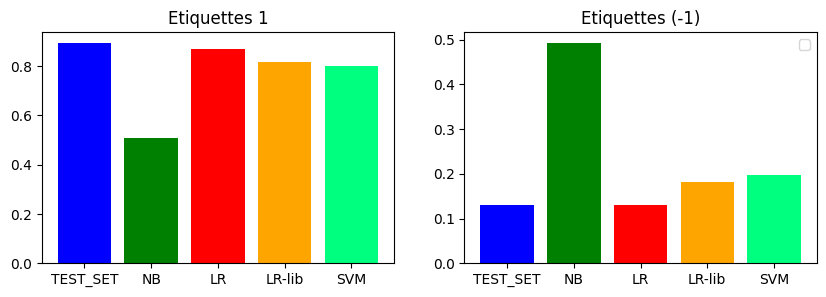

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Post-traitement : Etiquettes 1")
plt.bar(x=["TEST_SET"], height=sum(np.array(testalllabs)==1)/len(testalllabs), color='blue', label='Real')
plt.bar(x=["NB"], height=sum(pred_nb==1)/len(pred_nb), color='green', label='NB')
plt.bar(x=["LR"], height=sum(pred_lr==1)/len(pred_lr), color='red', label='LR')
plt.bar(x=["LR-lib"], height=sum(pred_lrlib==1)/len(pred_lrlib), color='orange', label='LR-liblinear')
plt.bar(x=["SVM"], height=sum(pred_svm==1)/len(pred_svm), color='springgreen', label='SVM')

plt.subplot(1,2,2)
plt.title("Post-traitement : Etiquettes (-1)")
plt.bar(x=["TEST_SET"], height=sum(np.array(y_test)!=1)/len(y_test), color='blue')
plt.bar(x=["NB"], height=sum(pred_nb!=1)/len(pred_nb), color='green')
plt.bar(x=["LR"], height=sum(pred_lr!=1)/len(pred_lr), color='red')
plt.bar(x=["LR-lib"], height=sum(pred_lrlib!=1)/len(pred_lrlib), color='orange')
plt.bar(x=["SVM"], height=sum(pred_svm!=1)/len(pred_nb), color='springgreen')
plt.legend()

plt.show()